# Проект «Определение перспективного тарифа для телеком компании»

В рамках данного проекта необходимо проанализировать поведение клиентов федерального оператора сотовой связи «Мегалайн»  и понять, какой тариф приносит оператору больше денег.

В распоряжении имеются данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Клиентам предлагается два тарифных плана - «Смарт» и «Ультра»:
- Тариф «Смарт»
  - Ежемесячная плата: 550 рублей
  - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
  - Стоимость услуг сверх тарифного пакета:
   - минута разговора: 3 рубля
   - сообщение: 3 рубля
   - 1 Гб интернет-трафика: 200 рублей
- Тариф «Ультра»
  - Ежемесячная плата: 1950 рублей
  - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
  - Стоимость услуг сверх тарифного пакета:
   - минута разговора: 1 рубль
   - сообщение: 1 рубль
   - 1 Гб интернет-трафика: 150 рублей

При проведении исследования необходимо учитывать, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

Исследование будем проводить в несколько шагов:
- [Откроем файл с данными и изучим общую информацию](#Шаг1) 
- [Подготовим данные к исследованию](#Шаг2) 
  - [Найдём и исправим ошибки в данных и приведём данные к нужным типам](#Шаг2.1)
  - [Посчитаем для каждого пользователя показатели](#Шаг2.2)
    - количество сделанных звонков и израсходованных минут разговора по месяцам
    - количество отправленных сообщений по месяцам
    - объём израсходованного интернет-трафика по месяцам
    - помесячную выручку с каждого пользователя

- [Проанализируем данные](#Шаг3)
   - Посчитаем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц, посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

- [Проверим гипотезы](#Шаг4)
  - Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
  - Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

- [Напишем общий вывод](#Шаг5)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-файл-с-данными-и-изучим-общую-информацию-" data-toc-modified-id="Откроем-файл-с-данными-и-изучим-общую-информацию--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем файл с данными и изучим общую информацию <a id="Шаг1"></a></a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Подготовим-данные-к-исследованию-" data-toc-modified-id="Подготовим-данные-к-исследованию--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовим данные к исследованию <a id="Шаг2"></a></a></span><ul class="toc-item"><li><span><a href="#Найдём-и-исправим-ошибки-в-данных-и-приведём-данные-к-нужным-типам--" data-toc-modified-id="Найдём-и-исправим-ошибки-в-данных-и-приведём-данные-к-нужным-типам---3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Найдём и исправим ошибки в данных и приведём данные к нужным типам  <a id="Шаг2.1"></a></a></span><ul class="toc-item"><li><span><a href="#Таблица-users---информация-о-пользователях" data-toc-modified-id="Таблица-users---информация-о-пользователях-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Таблица users - информация о пользователях</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Таблица-calls---информация-о-звонках" data-toc-modified-id="Таблица-calls---информация-о-звонках-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Таблица calls - информация о звонках</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Таблица-messages---информация-о-сообщениях" data-toc-modified-id="Таблица-messages---информация-о-сообщениях-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Таблица messages - информация о сообщениях</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Таблица-internet---информация-об-интернет-сессиях" data-toc-modified-id="Таблица-internet---информация-об-интернет-сессиях-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>Таблица internet - информация об интернет-сессиях</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.8"><span class="toc-item-num">3.1.8&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Таблица-tariffs---информация-о-тарифах" data-toc-modified-id="Таблица-tariffs---информация-о-тарифах-3.1.9"><span class="toc-item-num">3.1.9&nbsp;&nbsp;</span>Таблица tariffs - информация о тарифах</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.10"><span class="toc-item-num">3.1.10&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Посчитаем-для-каждого-пользователя-показатели-" data-toc-modified-id="Посчитаем-для-каждого-пользователя-показатели--3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Посчитаем для каждого пользователя показатели <a id="Шаг2.3"></a></a></span><ul class="toc-item"><li><span><a href="#Количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам-" data-toc-modified-id="Количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам--3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Количество сделанных звонков и израсходованных минут разговора по месяцам <a id="Шаг2.3.1"></a></a></span></li><li><span><a href="#Количество-отправленных-сообщений-по-месяцам" data-toc-modified-id="Количество-отправленных-сообщений-по-месяцам-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Количество отправленных сообщений по месяцам</a></span></li><li><span><a href="#Объём-израсходованного-интернет-трафика-по-месяцам" data-toc-modified-id="Объём-израсходованного-интернет-трафика-по-месяцам-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Объём израсходованного интернет-трафика по месяцам</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Помесячная-выручка-с-каждого-пользователя" data-toc-modified-id="Помесячная-выручка-с-каждого-пользователя-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Помесячная выручка с каждого пользователя</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Проанализируем-данные-" data-toc-modified-id="Проанализируем-данные--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проанализируем данные <a id="Шаг3"></a></a></span><ul class="toc-item"><li><span><a href="#Сколько-минут-разговора-требуется-пользователям-каждого-тарифа-в-месяц" data-toc-modified-id="Сколько-минут-разговора-требуется-пользователям-каждого-тарифа-в-месяц-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Сколько минут разговора требуется пользователям каждого тарифа в месяц</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Сколько-сообщений-требуется-пользователям-каждого-тарифа-в-месяц" data-toc-modified-id="Сколько-сообщений-требуется-пользователям-каждого-тарифа-в-месяц-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Сколько сообщений требуется пользователям каждого тарифа в месяц</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Какой-объём-интернет-трафика-требуется-пользователям-каждого-тарифа-в-месяц" data-toc-modified-id="Какой-объём-интернет-трафика-требуется-пользователям-каждого-тарифа-в-месяц-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Распределение-выручки-по-тарифам" data-toc-modified-id="Распределение-выручки-по-тарифам-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Распределение выручки по тарифам</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверим-гипотезы-" data-toc-modified-id="Проверим-гипотезы--5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверим гипотезы <a id="Шаг4"></a></a></span><ul class="toc-item"><li><span><a href="#Проверка-гипотезы----Cредняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различается" data-toc-modified-id="Проверка-гипотезы----Cредняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различается-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка гипотезы  - Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Проверка-гипотезы----Cредняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов" data-toc-modified-id="Проверка-гипотезы----Cредняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Проверка гипотезы  - Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод-" data-toc-modified-id="Общий-вывод--6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод <a id="Шаг5"></a></a></span></li></ul></div>

## Откроем файл с данными и изучим общую информацию <a id='Шаг1'></a>

In [1]:
#импортируем библиотеку pandas
import pandas as pd

#импортируем библиотеку numpy
import numpy as np

#импортируем библиотеку stats для работы со статистикой
from scipy import stats as st

#для создания графиков и гистограмм импортируем библиотеку matplotlib
import matplotlib.pyplot as plt

#импортируем библиотеку warnings, чтобы скрыть возникающие предупреждения
import warnings
warnings.filterwarnings('ignore')

In [3]:
#получим общую информацию о таблицах
for item, name in [(df_users, 'df_users'), (df_calls, 'df_calls'), (df_messages, 'df_messages'), (df_internet, 'df_internet'), (df_tariffs, 'df_tariffs')]:
    print('Первые пять строк таблицы', name, ':')
    print()
    display(item.head())
    
    print()
    
    print('Общая информация о таблице', name, ':')
    print()
    item.info()
    print()
   

Первые пять строк таблицы df_users :



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



Общая информация о таблице df_users :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Первые пять строк таблицы df_calls :



,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



Общая информация о таблице df_calls :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Первые пять строк таблицы df_messages :



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



Общая информация о таблице df_messages :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

Первые пять строк таблицы df_internet :



,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



Общая информация о таблице df_internet :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

Первые пять строк таблицы df_tariffs :



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



Общая информация о таблице df_tariffs :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes



In [4]:
#исключим столбец 'Unnamed: 0'
df_internet.drop('Unnamed: 0', axis = 1, inplace = True)

## Вывод

На данном шаге откроем таблицы с исходными данными и изучим общую информацию по каждой таблице.

- Таблица users - информация о пользователях
 - Столбцы таблицы users:
   - user_id — уникальный идентификатор пользователя
   - first_name — имя пользователя
   - last_name — фамилия пользователя
   - age — возраст пользователя (годы)
   - reg_date — дата подключения тарифа (день, месяц, год)
   - churn_date — дата прекращения пользования тарифом
   - city — город проживания пользователя
   - tariff — название тарифного плана


- Таблица calls - информация о звонках
 - Столбцы таблицы calls:
   - id — уникальный номер звонка
   - call_date — дата звонка
   - duration — длительность звонка в минутах
   - user_id — идентификатор пользователя, сделавшего звонок


- Таблица messages - информация о сообщениях
 - Столбцы таблицы messages:
   - id — уникальный номер сообщения
   - message_date — дата сообщения
   - user_id — идентификатор пользователя, отправившего сообщение


- Таблица internet - информация об интернет-сессиях
 - Столбцы таблицы internet:
   - id — уникальный номер сессии
   - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
   - session_date — дата интернет-сессии
   - user_id — идентификатор пользователя
   - столбец 'Unnamed: 0' исключим из набора, т.к. он дублирует индексы.
 
 
- Таблица tariffs - информация о тарифах
 - Столбцы таблицы tariffs:
   - tariff_name — название тарифа
   - rub_monthly_fee — ежемесячная абонентская плата в рублях
   - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
   - messages_included — количество сообщений в месяц, включённых в абонентскую плату
   - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
   - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
   - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
   - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
   
В соответсвии с полученной общей информацией в таблицах  'df_calls', 'df_messages', 'df_internet', 'df_tariffs' пропущенные значения отсутствуют. В таблице 'df_users' в столбце 'churn_date' значений меньше, чем в остальных столбцах, значит, есть пропущенные значения. По условию, если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Значит, у 38 пользователей из 500 тариф уже не действовал.

На следующем шаге рассмотрим наборы данных более подробно.

## Подготовим данные к исследованию <a id='Шаг2'></a>

### Найдём и исправим ошибки в данных и приведём данные к нужным типам  <a id='Шаг2.1'></a>

#### Таблица users - информация о пользователях

In [5]:
#посчитаем количество дубликатов в таблице с информацией о пользователях
print('Количество дубликатов в таблице с информацией о пользователях:')
print(df_users.duplicated().sum()) 

Количество дубликатов в таблице с информацией о пользователях:
0


In [6]:
#скорректируем формат отображения дат
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [7]:
#добавим к набору данных столбец с месяцем
df_users['reg_date_month'] = df_users['reg_date'].dt.month
df_users['churn_date_month'] = df_users['churn_date'].dt.month

In [8]:
#добавим к набору данных столбец с продолжительностью использования тарифа в днях
df_users['duration_users_day'] = df_users['churn_date'] - df_users['reg_date']

In [9]:
#получим первые пять строк таблицы df_users после добавления столбцов
print('Первые пять строк таблицы df_users после добавления столбцов:')
df_users.head()

Первые пять строк таблицы df_users после добавления столбцов:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_date_month,churn_date_month,duration_users_day
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,NaT
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,NaN,NaT
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,NaN,NaT
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,NaN,NaT
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,NaN,NaT


#### Вывод

Для таблицы с информацией о пользователях 'df_users' количество дубликатов равно нулю. Количество значений в столбце 'churn_date' — дата прекращения пользования тарифом - меньше, чем количество значений в остальных столбцах. Будем считать, что если значение пропущено, то тариф ещё действовал на момент выгрузки данных, т.е. пользователь на момент выгрузки ещё не прекратил пользоваться тарифом.
Cкорректируем формат отображения дат для столбцов 'reg_date' и 'churn_date'. Добавим к набору данных столбцы с номером месяца и столбец с продолжительностью использования тарифа в днях.

#### Таблица calls - информация о звонках

In [10]:
#посчитаем количество дубликатов в таблице с информацией о звонках
print('Количество дубликатов в таблице с информацией о звонках:')
print(df_calls.duplicated().sum()) 

Количество дубликатов в таблице с информацией о звонках:
0


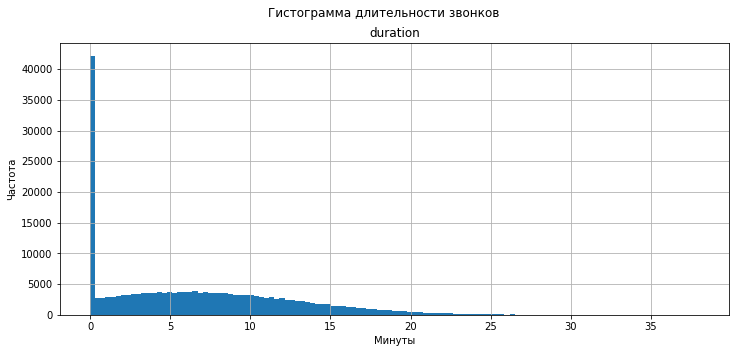

In [11]:
#построим гистограмму длительности звонков в минутах
df_calls.hist('duration', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма длительности звонков')
plt.xlabel('Минуты')
plt.ylabel('Частота')
plt.show()

In [12]:
#посчитаем количество звонков с нулевой длительностью
print('Количество звонков с нулевой длительностью:', df_calls['duration'].value_counts().sort_index()[0])

Количество звонков с нулевой длительностью: 39613


In [13]:
#посчитаем долю звонков с нулевой длительностью
print('Доля звонков с нулевой длительностью: {:.1%}'.format(df_calls['duration'].value_counts().sort_index()[0] / len(df_calls)))

Доля звонков с нулевой длительностью: 19.6%


In [14]:
#скореектируем звонки с нулевой длительностью
df_calls.loc[(df_calls.duration == 0), 'duration'] = 1

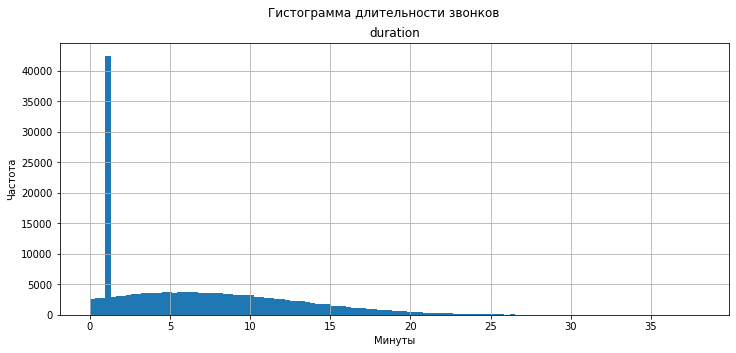

In [15]:
#построим гистограмму длительности звонков в минутах
df_calls.hist('duration', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма длительности звонков')
plt.xlabel('Минуты')
plt.ylabel('Частота')
plt.show()

In [16]:
#округлим значения длительности звонков
df_calls['duration'] = np.ceil(df_calls['duration'])

In [17]:
#заменим вещественный тип данных на целочисленный для значений длительности звонков
df_calls['duration'] = df_calls['duration'].astype('int')

#проверим тип данных
print(df_calls['duration'].dtype)

int64


In [18]:
#скорректируем формат отображения дат
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [19]:
#добавим к набору данных столбец с месяцем
df_calls['month'] = df_calls['call_date'].dt.month

In [20]:
#получим первые пять строк таблицы df_calls после добавления столбца
print('Первые пять строк таблицы df_calls после добавления столбца:')
df_calls.head()

Первые пять строк таблицы df_calls после добавления столбца:


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


#### Вывод

Для таблицы с информацией о звонках количество дубликатов равно нулю, пропущенные значения отсутствуют.
Для длительности звонков в минутах построим гистограмму методом hist(). Гистограмма отображается с длинным хвостом на высоких значениях и пиковым значением на малых.
Длительность многих звонков — 0.0 минут. Количество таких звонков с нулевой длительностью равна 39613, что составляет почти 20% от общего числа звонков. Это большой процент, исключать такие значения не будем, а заменим такие значения на единицу. 
Далее округлим значения длительности звонков вверх,т.к. в соответствии с условием «Мегалайн» всегда округляет вверх значения минут, и заменим вещественный тип данных на целочисленный для значений длительности звонков.

#### Таблица messages - информация о сообщениях

In [21]:
#посчитаем количество дубликатов в таблице с информацией о сообщениях
print('Количество дубликатов в таблице с информацией о сообщениях:')
print(df_messages.duplicated().sum()) 

Количество дубликатов в таблице с информацией о сообщениях:
0


In [22]:
#скорректируем формат отображения дат
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [23]:
#добавим к набору данных столбец с месяцем
df_messages['month'] = df_messages['message_date'].dt.month

In [24]:
#получим первые пять строк таблицы df_messages после добавления столбца
print('Первые пять строк таблицы df_messages после добавления столбца:')
df_messages.head()

Первые пять строк таблицы df_messages после добавления столбца:


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


#### Вывод

Количество дубликатов в таблице с информацией о сообщениях равно нулю, пропущенные значения отсутствуют. Скорректируем формат отображения дат и добавим к набору данных новый столбец с месяцем.

#### Таблица internet - информация об интернет-сессиях

In [25]:
#посчитаем количество дубликатов в таблице с информацией об интернет-сессиях
print('Количество дубликатов в таблице с информацией об интернет-сессиях:')
print(df_internet.duplicated().sum()) 

Количество дубликатов в таблице с информацией об интернет-сессиях:
0


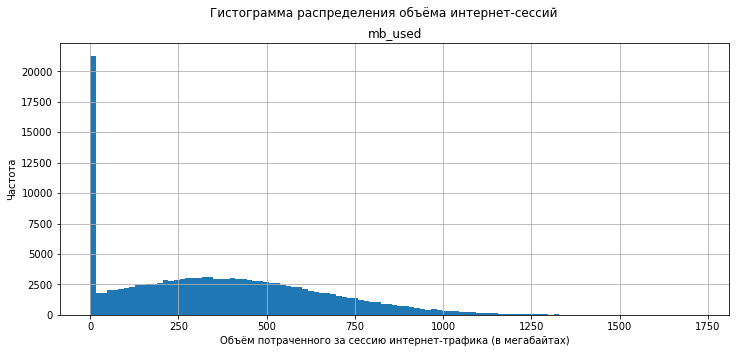

In [26]:
#построим гистограмму длительности интернет-сессий
df_internet.hist('mb_used', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма распределения объёма интернет-сессий')
plt.xlabel('Объём потраченного за сессию интернет-трафика (в мегабайтах)')
plt.ylabel('Частота')
plt.show()

In [27]:
#посчитаем количество нулевых интернет-сессий
print('Количество нулевых интернет-сессий:', df_internet['mb_used'].value_counts().sort_index()[0])

Количество нулевых интернет-сессий: 19598


In [28]:
#посчитаем долю нулевых интернет-сессий
print('Доля нулевых интернет-сессий: {:.1%}'.format(df_internet['mb_used'].value_counts().sort_index()[0] / len(df_internet)))

Доля нулевых интернет-сессий: 13.1%


In [29]:
#скореектируем звонки с нулевой длительностью
df_internet.loc[(df_internet.mb_used == 0), 'mb_used'] = 1

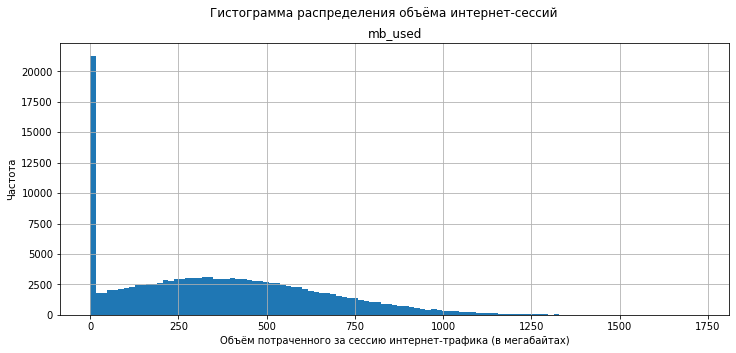

In [30]:
#построим гистограмму длительности интернет-сессий
df_internet.hist('mb_used', figsize=(12,5), bins = 'auto')
plt.suptitle('Гистограмма распределения объёма интернет-сессий')
plt.xlabel('Объём потраченного за сессию интернет-трафика (в мегабайтах)')
plt.ylabel('Частота')
plt.show()

In [31]:
#округлим значения объёма потраченного за сессию интернет-трафика
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])

In [32]:
#заменим вещественный тип данных на целочисленный для значений объёма потраченного за сессию интернет-трафика
df_internet['mb_used'] = df_internet['mb_used'].astype('int')

#проверим тип данных
print(df_internet['mb_used'].dtype)

int64


In [33]:
#скорректируем формат отображения дат
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [34]:
#добавим к набору данных столбец с месяцем
df_internet['month'] = df_internet['session_date'].dt.month

In [35]:
#получим первые пять строк таблицы df_internet после добавления столбца
print('Первые пять строк таблицы df_internet после добавления столбца:')
df_internet.head()

Первые пять строк таблицы df_internet после добавления столбца:


,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


#### Вывод

Количество дубликатов в таблице с информацией об интернет-сессиях равно нулю, пропущенные значения отсутствуют.
Для длительности интернет-сессий построим гистограмму методом hist(). Гистограмма отображается с длинным хвостом на высоких значениях и пиковым значением на малых. Объём некоторых интернет-сессий — 0 Мб. Количество таких интернет-сессий с нулевым объёмом равно 19598, что составляет 13,1 % от общего объёма интернет-сессий. Это большой процент, будем считать, что такие ситуации могли возникнуть, когда пользователь зашёл в интернет, но потом интернет-соединение оборвалось, например, когда пользователь поднимался/спускался на лифте. Исключать такие значения не будем, также как и с длительностью звонков. Заменим такие нулевые значения на 1 Мб.
Округлим значения объёма потраченного за сессию интернет-трафика, т.к. в соответствии с условием «Мегалайн» всегда округляет вверх значения мегабайтов. Далее заменим вещественный тип данных на целочисленный.
Скорректируем формат отображения дат и добавим к набору данных новый столбец с месяцем.

####  Таблица tariffs - информация о тарифах

In [36]:
#посчитаем количество дубликатов в таблице с информацией о тарифах
print('Количество дубликатов в таблице с информацией о тарифах:')
print(df_tariffs.duplicated().sum()) 

Количество дубликатов в таблице с информацией о тарифах:
0


In [37]:
#переведём Мб в Гб для набора данных с тарифами
df_tariffs['gb_per_month_included'] = df_tariffs['mb_per_month_included']/1024
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


#### Вывод

Количество дубликатов в таблице с информацией о тарифах равно нулю, пропущенные значения отсутствуют. 
Добавим новый столбец, где для удобства переведём Мб в Гб.

### Посчитаем для каждого пользователя показатели <a id='Шаг2.3'></a>

#### Количество сделанных звонков и израсходованных минут разговора по месяцам <a id='Шаг2.3.1'></a>

In [38]:
#сформируем сводную таблицу 
calls = df_calls.pivot_table(index = ['user_id', 'month'], values = 'duration',
                             aggfunc = ['count', 'sum']).reset_index()
#скорректируем наименование столбцов 
calls.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
calls.head()

,user_id,month,calls_count,calls_sum
0,1000,5,22,164
1,1000,6,43,187
2,1000,7,47,346
3,1000,8,52,418
4,1000,9,58,478


In [39]:
#подсчитаем максимальное количество сделанных звонков
calls['calls_count'].max()

244

In [40]:
#подсчитаем минимальное количество сделанных звонков
calls['calls_count'].min()

1

In [41]:
#подсчитаем максимальное количество израсходованных минут
calls['calls_sum'].max()

1727

In [42]:
#подсчитаем минимальное количество израсходованных минут
calls['calls_sum'].min()

1

#### Количество отправленных сообщений по месяцам

In [43]:
#сформируем сводную таблицу 
messages = df_messages.pivot_table(index = ['user_id', 'month'], values = 'id',
                             aggfunc = 'count').reset_index()

#скорректируем наименование столбцов
messages.columns = ['user_id', 'month', 'messages_count']
messages.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [44]:
#подсчитаем максимальное количество отправленных сообщений
messages['messages_count'].max()

224

In [45]:
#подсчитаем минимальное количество отправленных сообщений
messages['messages_count'].min()

1

#### Объём израсходованного интернет-трафика по месяцам

In [46]:
#сформируем сводную таблицу 
internet = df_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used',
                             aggfunc = 'sum').reset_index()

#скорректируем наименование столбцов 
internet.columns = ['user_id', 'month', 'internet_sum']

In [47]:
#переведём мегабайты в гигабайты и округлим в большую сторону
internet['internet_sum_gb'] = np.ceil((internet['internet_sum'])/1024)
internet.head()

,user_id,month,internet_sum,internet_sum_gb
0,1000,5,2257,3.0
1,1000,6,23262,23.0
2,1000,7,14017,14.0
3,1000,8,14072,14.0
4,1000,9,14583,15.0


In [48]:
#подсчитаем максимальный объём израсходанного интернет-трафика
internet['internet_sum_gb'].max()

49.0

In [49]:
#подсчитаем минимальный объём израсходанного интернет-трафика
internet['internet_sum_gb'].min()

1.0

#### Вывод

На данном шаге посчитаем показатели для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам  при помощи сводных таблиц.


Также подсчитаем максимальное и минимальное значение для каждого из показателей.
 - Максимальное количество сделанных звонков - 244
 - Минимальное количество сделанных звонков - 1
 - Максимальное количество израсходованных минут - 1727
 - Минимальное количество израсходованных минут - 1
 - Максимальное количество отправленных сообщений - 224
 - Минимальное количество отправленных сообщений - 1
 - Максимальный объём израсходанного интернет-трафика - 49.0
 - Минимальный объём израсходанного интернет-трафика - 1.0

#### Помесячная выручка с каждого пользователя

In [50]:
#подсчитаем количество уникальных user_id для таблицы df_users
print('Количество уникальных user_id для таблицы df_users:', len(df_users['user_id'].value_counts()))

Количество уникальных user_id для таблицы df_users: 500


In [51]:
#подсчитаем количество уникальных user_id для таблицы df_calls
print('Количество уникальных user_id для таблицы df_calls:',len(df_calls['user_id'].value_counts()))

Количество уникальных user_id для таблицы df_calls: 492


In [52]:
#подсчитаем количество уникальных user_id для таблицы df_messages
print('Количество уникальных user_id для таблицы df_messages:', len(df_messages['user_id'].value_counts()))

Количество уникальных user_id для таблицы df_messages: 426


In [53]:
#подсчитаем количество уникальных user_id для таблицы df_internet
print('Количество уникальных user_id для таблицы df_internet:', len(df_internet['user_id'].value_counts()))

Количество уникальных user_id для таблицы df_internet: 497


In [54]:
#объединим таблицы с информацией о звонках и сообщениях
df_calls_messages = calls.merge(messages, on = ['user_id', 'month'], how = 'outer')
df_calls_messages.head()

,user_id,month,calls_count,calls_sum,messages_count
0,1000,5,22.0,164.0,22.0
1,1000,6,43.0,187.0,60.0
2,1000,7,47.0,346.0,75.0
3,1000,8,52.0,418.0,81.0
4,1000,9,58.0,478.0,57.0


In [55]:
#подсчитаем количество уникальных user_id после объединения
print('Количество уникальных user_id для таблицы df_calls_messages:', len(df_calls_messages['user_id'].value_counts()))

Количество уникальных user_id для таблицы df_calls_messages: 498


In [56]:
#добавим таблицу с информацией об интернете
df = df_calls_messages.merge(internet, on = ['user_id', 'month'], how = 'outer')
df.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,internet_sum_gb
0,1000,5,22.0,164.0,22.0,2257.0,3.0
1,1000,6,43.0,187.0,60.0,23262.0,23.0
2,1000,7,47.0,346.0,75.0,14017.0,14.0
3,1000,8,52.0,418.0,81.0,14072.0,14.0
4,1000,9,58.0,478.0,57.0,14583.0,15.0


In [57]:
#подсчитаем количество уникальных user_id после объединения
print('Количество уникальных user_id для таблицы df:', len(df['user_id'].value_counts()))

Количество уникальных user_id для таблицы df: 498


In [58]:
#обозначим, какие user_id не попали в набор данных
set(df_users['user_id'].unique()) - set(df['user_id'].unique())

{1128, 1371}

In [59]:
#рассмотрим подробнее информацию о пользователях, не попавших в набор данных после объединения
df_users[df_users['user_id'] == 1128]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_date_month,churn_date_month,duration_users_day
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12,12.0,8 days


In [60]:
#рассмотрим подробнее информацию о пользователях, не попавших в набор данных после объединения
df_users[df_users['user_id'] == 1371]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_date_month,churn_date_month,duration_users_day
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12,12.0,5 days


In [61]:
#вычислим пользователей, которые пользовались тарифом менее месяца
df_users[df_users['duration_users_day'] < '30 days']

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_date_month,churn_date_month,duration_users_day
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart,11,12.0,23 days
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12,12.0,8 days
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12,12.0,5 days


In [62]:
#добавим таблицу с информацией о тарифе
df = df.merge(df_users[['user_id', 'tariff']], on = 'user_id', how = 'left')
df.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,internet_sum_gb,tariff
0,1000,5,22.0,164.0,22.0,2257.0,3.0,ultra
1,1000,6,43.0,187.0,60.0,23262.0,23.0,ultra
2,1000,7,47.0,346.0,75.0,14017.0,14.0,ultra
3,1000,8,52.0,418.0,81.0,14072.0,14.0,ultra
4,1000,9,58.0,478.0,57.0,14583.0,15.0,ultra


In [63]:
#напишем функцию для вычисления помесячной выручки
def revenue_month(row):
    revenue = 0
    
    calls_sum = row['calls_sum']
    messages_count = row['messages_count']
    internet_sum_gb = row['internet_sum_gb']
    tariff = row['tariff']
    
    #подсчитаем разницу между потраченным пользователем объёмом услуг и включенным в пакет
    variance_calls = calls_sum - int(df_tariffs[df_tariffs['tariff_name'] == tariff]['minutes_included'])
    variance_messages = messages_count - int(df_tariffs[df_tariffs['tariff_name'] == tariff]['messages_included'])
    variance_internet = internet_sum_gb - int(df_tariffs[df_tariffs['tariff_name'] == tariff]['gb_per_month_included'])
    
    #рассчитаем дополнительную плату, если пользователь вышел за пределы пакета услуг
    if variance_calls > 0:
        revenue += variance_calls * int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_minute'])
    
    if variance_messages > 0:
        revenue += variance_messages * int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_message'])
        
    if variance_internet > 0:
        revenue += variance_internet * int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_per_gb'])
     
    #прибавим абонентскую плату, соответствующую тарифному плану
    revenue += int(df_tariffs[df_tariffs['tariff_name'] == tariff]['rub_monthly_fee'])    
    
    return revenue

In [64]:
#вычислим помесячную выручку
df['revenue_month'] = df.apply(revenue_month, axis = 1)

In [65]:
#заменим вещественный тип данных на целочисленный для значений выручки
df['revenue_month'] = df['revenue_month'].astype('int')

#проверим тип данных
print(df['revenue_month'].dtype)

int64


In [66]:
df.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,internet_sum_gb,tariff,revenue_month
0,1000,5,22.0,164.0,22.0,2257.0,3.0,ultra,1950
1,1000,6,43.0,187.0,60.0,23262.0,23.0,ultra,1950
2,1000,7,47.0,346.0,75.0,14017.0,14.0,ultra,1950
3,1000,8,52.0,418.0,81.0,14072.0,14.0,ultra,1950
4,1000,9,58.0,478.0,57.0,14583.0,15.0,ultra,1950


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
user_id            3214 non-null int64
month              3214 non-null int64
calls_count        3174 non-null float64
calls_sum          3174 non-null float64
messages_count     2717 non-null float64
internet_sum       3203 non-null float64
internet_sum_gb    3203 non-null float64
tariff             3214 non-null object
revenue_month      3214 non-null int64
dtypes: float64(5), int64(3), object(1)
memory usage: 251.1+ KB


In [68]:
#подсчитаем максимальное значение выручки
df['revenue_month'].max()

6824

In [69]:
#подсчитаем минимальное значение выручки
df['revenue_month'].min()

550

#### Вывод

Для вычисления выручки будем объединять таблицы в одну, но для начала подсчитаем количество уникальных user_id для каждой таблицы. Всего уникальных пользователей 500. Информация по звонкам представлена для 492 пользователей, по сообщениям - для 426 пользователей, по интернету - для 497 пользователей.


Далее в три шага проведём объединение таблиц в одну при помощи merge(): сначала объединим талицы с информацией о звонках и сообщениях, далее к объединённой добавим данные по интернету, и следом данные по тарифам. В итоге получаем набор данных df.
После объединения проверим количество уникальных пользователей, оно составляет 498, значит, два пользователя не попали в новый набор. У данных пользователей дата подключения тарифа 'reg_date' и дата прекращения пользования тарифом 'churn_date' отличаются на восемь и пять дней соответственно, т.е.пользователи подключились к тарифу, и практически сразу прекратили им пользоваться. 
Далее вычислим пользователей, которые пользовались тарифом непродолжительное время, менее месяца, аналогично найденным двум пользователям. Таких пользователей оказалось трое, т.е. суммарно всего пять человек из 500 пользовались услугами оператора меньше месяца.

Для вычисления помесячной выручки напишем функцию, в которой подсчитаем разницу между потраченным пользователем объёмом услуг и включенным в пакет, рассчитаем дополнительную плату, если пользователь вышел за пределы пакета услуг и прибавим абонентскую плату, соответствующую тарифному плану.
В итоге максимальное значение выручки 6824, минимальное - 550.

В дальнейшем для анализа используем таблицу df.

## Проанализируем данные <a id='Шаг3'></a>

### Сколько минут разговора требуется пользователям каждого тарифа в месяц

In [70]:
#сформируем сводную таблицу по id пользователя и месяцу для тарифа Smart
smart = df[df['tariff'] == 'smart'].pivot_table(index = ['user_id', 'month'], 
                                        values = ['calls_sum', 'messages_count', 'internet_sum_gb'], aggfunc = 'sum') 
smart

calls_sum  internet_sum_gb  messages_count
user_id month                                            
1001    11         444.0             19.0             0.0
        12         430.0             14.0             0.0
1002    6          118.0             11.0             4.0
        7          219.0             18.0            11.0
        8          294.0             20.0            13.0
...                  ...              ...             ...
1498    10         258.0             21.0            42.0
1499    9           71.0              2.0            11.0
        10         473.0             18.0            48.0
        11         624.0             18.0            59.0
        12         505.0             13.0            66.0

[2229 rows x 3 columns]

In [71]:
#сформируем сводную таблицу по id пользователя и месяцу для тарифа Ultra
ultra = df[df['tariff'] == 'ultra'].pivot_table(index = ['user_id', 'month'], 
                                        values = ['calls_sum', 'messages_count', 'internet_sum_gb'], aggfunc = 'sum')
ultra

calls_sum  internet_sum_gb  messages_count
user_id month                                            
1000    5          164.0              3.0            22.0
        6          187.0             23.0            60.0
        7          346.0             14.0            75.0
        8          418.0             14.0            81.0
        9          478.0             15.0            57.0
...                  ...              ...             ...
1495    8           96.0              3.0            13.0
        9          830.0             33.0            82.0
        10        1056.0             29.0            82.0
        11         971.0             39.0            79.0
        12        1066.0             23.0            84.0

[985 rows x 3 columns]

In [72]:
print('Среднее значение длительности звонков для тарифа Smart:')
smart['calls_sum'].mean()

Среднее значение длительности звонков для тарифа Smart:


429.45087483176314

In [73]:
print('Среднее значение длительности звонков для тарифа Ultra:')
ultra['calls_sum'].mean()

Среднее значение длительности звонков для тарифа Ultra:


540.7796954314721

In [74]:
print('Медианное значение длительности звонков для тарифа Smart:')
smart['calls_sum'].median()

Медианное значение длительности звонков для тарифа Smart:


435.0

In [75]:
print('Медианное значение длительности звонков для тарифа Ultra:')
ultra['calls_sum'].median()

Медианное значение длительности звонков для тарифа Ultra:


532.0

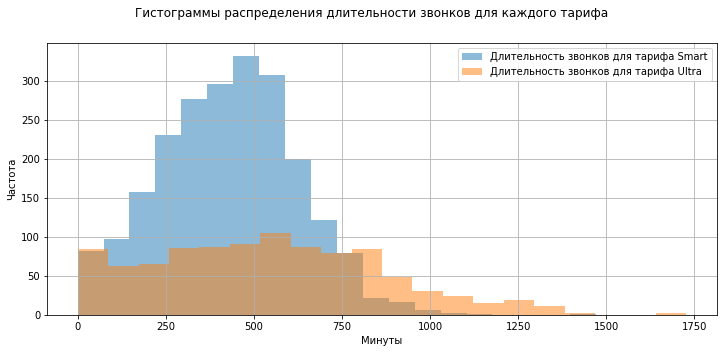

In [76]:
#построим гистограммы распределения длительности звонков по тарифам
ax1 = smart['calls_sum'].plot(kind = 'hist', y = 'calls_sum', label = 'Длительность звонков для тарифа Smart', alpha = 0.5, bins = 20, figsize=(12,5), grid = True)
ax2 = ultra['calls_sum'].plot(kind = 'hist', y = 'calls_sum', label = 'Длительность звонков для тарифа Ultra', alpha = 0.5, bins = 20, figsize=(12,5), grid = True)


plt.suptitle('Гистограммы распределения длительности звонков для каждого тарифа')
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.xlabel('Минуты')
plt.ylabel('Частота')
plt.show()

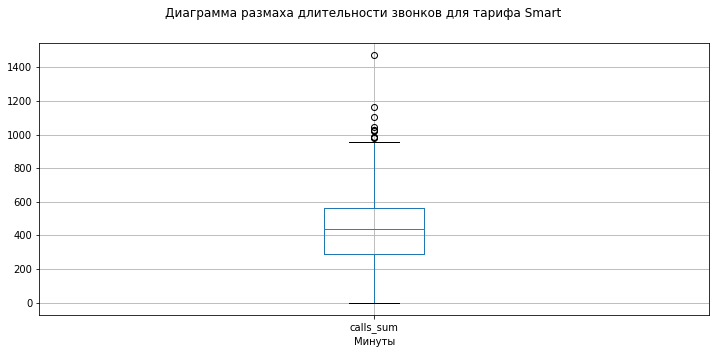

In [77]:
#построим диаграмму размаха длительности звонков для тарифа Smart
smart['calls_sum'].plot.box(grid=True, figsize=(12,5))
plt.suptitle('Диаграмма размаха длительности звонков для тарифа Smart')
plt.xlabel('Минуты')
plt.show()

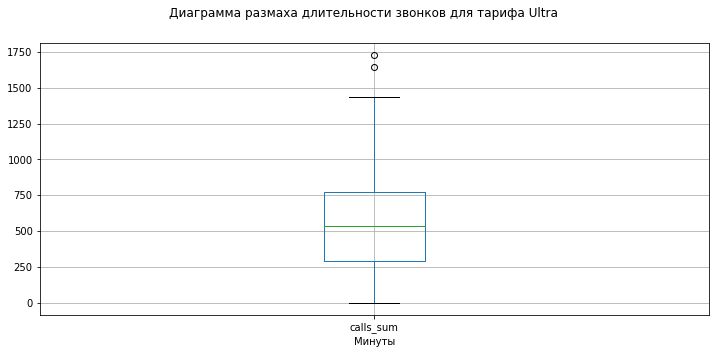

In [78]:
#построим диаграмму размаха длительности звонков для тарифа Ultra
ultra['calls_sum'].plot.box(grid=True, figsize=(12,5))
plt.suptitle('Диаграмма размаха длительности звонков для тарифа Ultra')
plt.xlabel('Минуты')
plt.show()

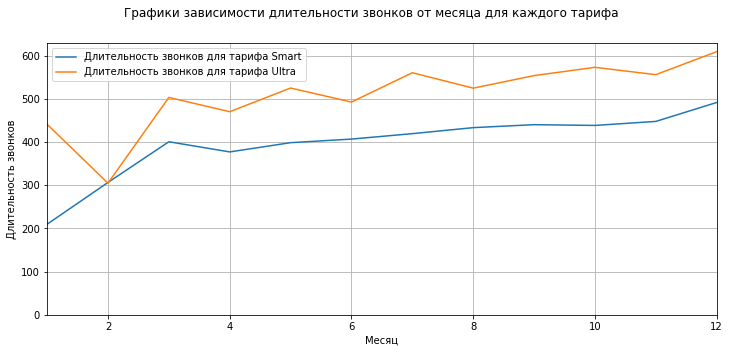

In [79]:
#построим графики зависимости длительности звонков от месяца для каждого тарифа
ax = smart.pivot_table(index ='month',
                                             values = 'calls_sum').plot(y = 'calls_sum', label = 'Длительность звонков для тарифа Smart', figsize=(12,5), grid = True)
ultra.pivot_table(index ='month',
                                             values = 'calls_sum').plot(y = 'calls_sum', label = 'Длительность звонков для тарифа Ultra', ax = ax, figsize=(12,5), grid = True)

plt.suptitle('Графики зависимости длительности звонков от месяца для каждого тарифа')
plt.xlabel('Месяц')
plt.ylabel('Длительность звонков')
plt.ylim(bottom=0)
plt.show()

In [80]:
print('Значение дисперсии длительности звонков для тарифа Smart:')
smart['calls_sum'].var()

Значение дисперсии длительности звонков для тарифа Smart:


37974.774627825

In [81]:
print('Значение дисперсии длительности звонков для тарифа Ultra:')
ultra['calls_sum'].var()

Значение дисперсии длительности звонков для тарифа Ultra:


106105.72682307787

In [82]:
print('Значение стандартного отклонения длительности звонков для тарифа Smart:')
smart['calls_sum'].std()

Значение стандартного отклонения длительности звонков для тарифа Smart:


194.87117444051339

In [83]:
print('Значение стандартного отклонения длительности звонков для тарифа Ultra:')
ultra['calls_sum'].std()

Значение стандартного отклонения длительности звонков для тарифа Ultra:


325.7387401324532

### Вывод

На данном шаге проанализируем, сколько минут разговора требуется пользователям каждого тарифа, посчитаем дисперсию и стандартное отклонение.
 - Среднее значение длительности звонков для тарифа Smart - 429 мин.
 - Среднее значение длительности звонков для тарифа Ultra - 540 мин.
 - Медианное значение длительности звонков для тарифа Smart - 435 мин.
 - Медианное значение длительности звонков для тарифа Ultra - 532 мин.
 - Значение дисперсии длительности звонков для тарифа Smart - 37974
 - Значение дисперсии длительности звонков для тарифа Ultra - 106105
 - Значение стандартного отклонения длительности звонков для тарифа Smart - 194
 - Значение стандартного отклонения длительности звонков для тарифа Ultra - 325
 
Сравним среднее значение и медиану для каждого тарифа. Для тарифа Smart среднее значение немного меньше медианного, значит, набор данных немного скошен влево.  Для тарифа Ultra среднее значение больше медианного, значит, набор данных скошен вправо.

Дисперсия значений для тарифа Ultra больше, чем для тарифа Smart.

Построим гистограммы длительности телефонных разговоров. Гистограммы распределения длительности звонков ассиметричны, прослеживается скошенность вправа. 

Построим график изменения длительности в зависимости от месяца. Больше всего пользователи обоих тарифов разговаривают по телефону в декабре (что ожидаемо из-за закрытия года и праздников), меньше всего пользователи тарифа Smart разговаривают в январе, а пользователи тарифа Ultra в феврале. На графике также видим, что рост длительности звонков у пользователей тарифа Smart происходит более плавно, чем у пользователей тарифа Ultra.
На диаграмме размаха длительности звонков также отображается скошенность вправо.

### Сколько сообщений требуется пользователям каждого тарифа в месяц

In [84]:
print('Среднее значение количества сообщений для тарифа Smart:')
smart['messages_count'].mean()

Среднее значение количества сообщений для тарифа Smart:


33.384028712427096

In [85]:
print('Среднее значение количества сообщений для тарифа Ultra:')
ultra['messages_count'].mean()

Среднее значение количества сообщений для тарифа Ultra:


49.36345177664975

In [86]:
print('Медианное значение количества сообщений для тарифа Smart:')
smart['messages_count'].median()

Медианное значение количества сообщений для тарифа Smart:


28.0

In [87]:
print('Медианное значение количества сообщений для тарифа Ultra:')
ultra['messages_count'].median()

Медианное значение количества сообщений для тарифа Ultra:


38.0

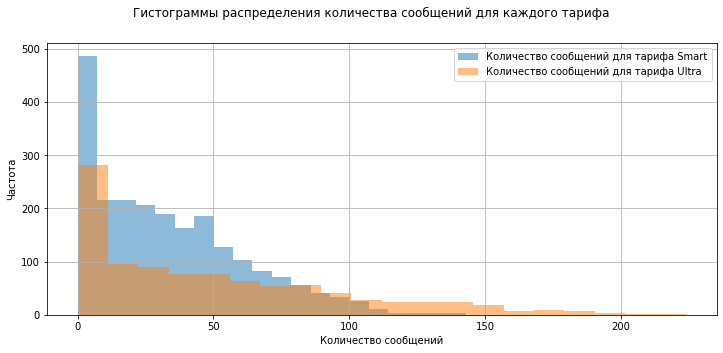

In [88]:
#построим гистограммы распределения количества сообщений по тарифам
ax1 = smart['messages_count'].plot(kind = 'hist', y = 'messages_count', label = 'Количество сообщений для тарифа Smart', alpha = 0.5, bins = 20, figsize=(12,5), grid = True)
ax2 = ultra['messages_count'].plot(kind = 'hist', y = 'messages_count', label = 'Количество сообщений для тарифа Ultra', alpha = 0.5, bins = 20, figsize=(12,5), grid = True)


plt.suptitle('Гистограммы распределения количества сообщений для каждого тарифа')
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.xlabel('Количество сообщений')
plt.ylabel('Частота')
plt.show()

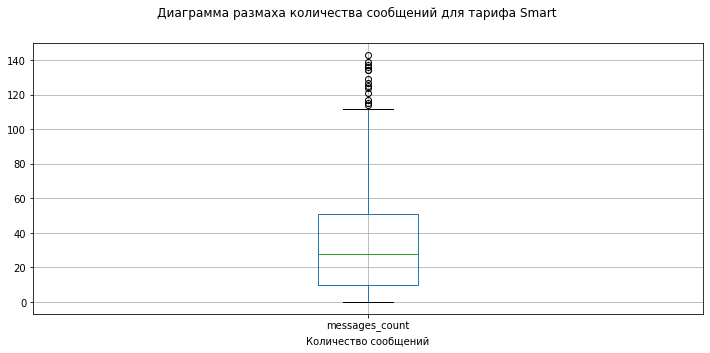

In [89]:
#построим диаграмму размаха количества сообщений для тарифа Smart
smart['messages_count'].plot.box(grid=True, figsize=(12,5))
plt.suptitle('Диаграмма размаха количества сообщений для тарифа Smart')
plt.xlabel('Количество сообщений')
plt.show()

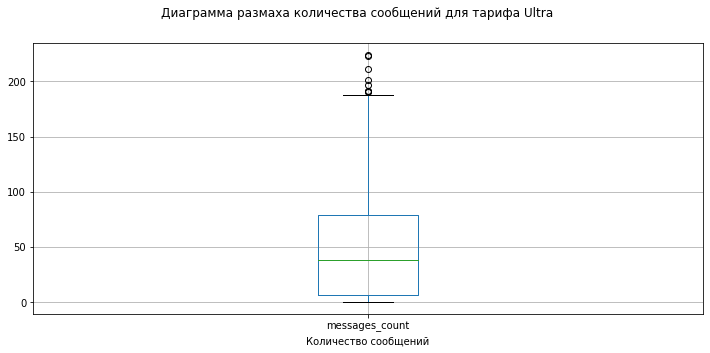

In [90]:
#построим диаграмму размаха количества сообщений для тарифа Ultra
ultra['messages_count'].plot.box(grid=True, figsize=(12,5))
plt.suptitle('Диаграмма размаха количества сообщений для тарифа Ultra')
plt.xlabel('Количество сообщений')
plt.show()

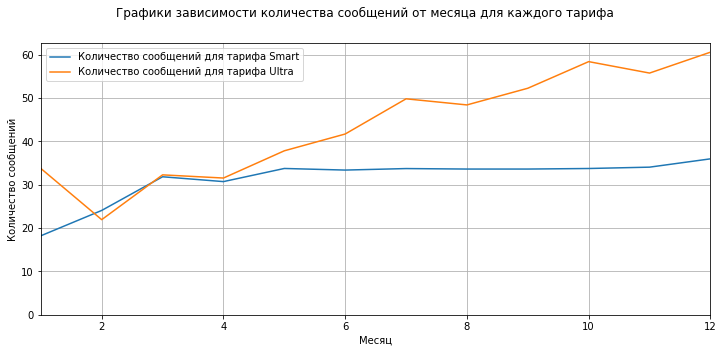

In [91]:
#построим графики зависимости количества сообщений от месяца для каждого тарифа
ax = smart.pivot_table(index ='month',
                                             values = 'messages_count').plot(y = 'messages_count', label = 'Количество сообщений для тарифа Smart', figsize=(12,5), grid = True)
ultra.pivot_table(index ='month',
                                             values = 'messages_count').plot(y = 'messages_count', label = 'Количество сообщений для тарифа Ultra', ax = ax, figsize=(12,5), grid = True)

plt.suptitle('Графики зависимости количества сообщений от месяца для каждого тарифа')
plt.xlabel('Месяц')
plt.ylabel('Количество сообщений')
plt.ylim(bottom=0)
plt.show()

In [92]:
print('Значение дисперсии количества сообщений для тарифа Smart:')
smart['messages_count'].var()

Значение дисперсии количества сообщений для тарифа Smart:


796.8129584480083

In [93]:
print('Значение дисперсии количества сообщений для тарифа Ultra:')
ultra['messages_count'].var()

Значение дисперсии количества сообщений для тарифа Ultra:


2285.266142544674

In [94]:
print('Значение стандартного отклонения количества сообщений для тарифа Smart:')
smart['messages_count'].std()

Значение стандартного отклонения количества сообщений для тарифа Smart:


28.22787555676141

In [95]:
print('Значение стандартного отклонения количества сообщений для тарифа Ultra:')
ultra['messages_count'].std()

Значение стандартного отклонения количества сообщений для тарифа Ultra:


47.80445735017472

### Вывод

На данном шаге проанализируем, сколько сообщений требуется пользователям каждого тарифа в месяц, посчитаем дисперсию и стандартное отклонение.
 - Среднее значение количества сообщений для тарифа Smart - 33
 - Среднее значение количества сообщений для тарифа Ultra - 49
 - Медианное значение количества сообщений для тарифа Smart - 28
 - Медианное значение количества сообщений для тарифа Ultra - 38
 - Значение дисперсии количества сообщений для тарифа Smart - 796
 - Значение дисперсии количества сообщений для тарифа Ultra - 2285
 - Значение стандартного отклонения количества сообщений для тарифа Smart - 28
 - Значение стандартного отклонения количества сообщений для тарифа Ultra - 47

Сравним среднее значение и медиану для каждого тарифа. Для обоих тарифов среднее значение больше медианного, значит, набор данных скошен вправо.

Дисперсия значений для тарифа Ultra больше, чем для тарифа Smart.

Построим гистограммы распределения количества сообщений. Гистограммы распределения количества сообщений ассиметричны, прослеживается скошенность вправа. 

Построим график изменения количества сообщений в зависимости от месяца. Больше всего пользователи обоих тарифов отправляют сообщений в декабре (что также ожидаемо из-за закрытия года и праздников), меньше всего пользователи тарифа Smart отправляют сообщений в январе, а пользователи тарифа Ultra в феврале. На графике также видим, что рост количества сообщений у пользователей тарифа Smart происходит более плавно, чем у пользователей тарифа Ultra.
На диаграмме размаха также отображается скошенность вправа.

### Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

In [96]:
print('Среднее значение объёма интернет-трафика для тарифа Smart:')
smart['internet_sum_gb'].mean()

Среднее значение объёма интернет-трафика для тарифа Smart:


16.365634813817856

In [97]:
print('Среднее значение объёма интернет-трафика для тарифа Ultra:')
ultra['internet_sum_gb'].mean()

Среднее значение объёма интернет-трафика для тарифа Ultra:


19.528934010152284

In [98]:
print('Медианное значение объёма интернет-трафика для тарифа Smart:')
smart['internet_sum_gb'].median()

Медианное значение объёма интернет-трафика для тарифа Smart:


17.0

In [99]:
print('Медианное значение объёма интернет-трафика для тарифа Ultra:')
ultra['internet_sum_gb'].median()

Медианное значение объёма интернет-трафика для тарифа Ultra:


19.0

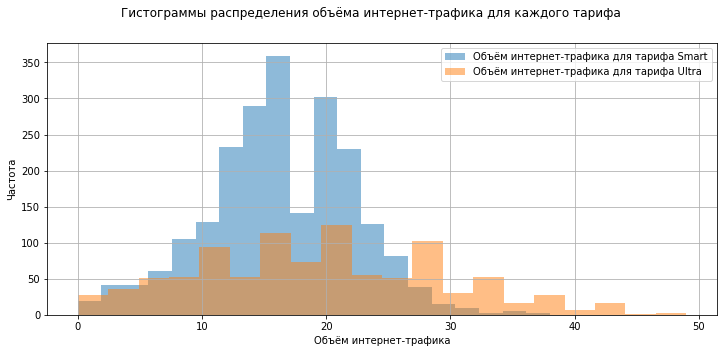

In [100]:
#построим гистограммы распределения объёма интернет-трафика по тарифам
ax1 = smart['internet_sum_gb'].plot(kind = 'hist', y = 'internet_sum_gb', label = 'Объём интернет-трафика для тарифа Smart', alpha = 0.5, bins = 20, figsize=(12,5), grid = True)
ax2 = ultra['internet_sum_gb'].plot(kind = 'hist', y = 'internet_sum_gb', label = 'Объём интернет-трафика для тарифа Ultra', alpha = 0.5, bins = 20, figsize=(12,5), grid = True)


plt.suptitle('Гистограммы распределения объёма интернет-трафика для каждого тарифа')
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.xlabel('Объём интернет-трафика')
plt.ylabel('Частота')
plt.show()

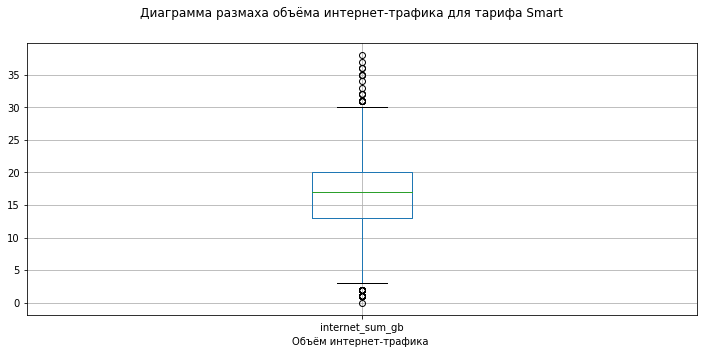

In [101]:
#построим диаграмму размаха объёма интернет-трафика для тарифа Smart
smart['internet_sum_gb'].plot.box(grid=True, figsize=(12,5))
plt.suptitle('Диаграмма размаха объёма интернет-трафика для тарифа Smart')
plt.xlabel('Объём интернет-трафика ')
plt.show()

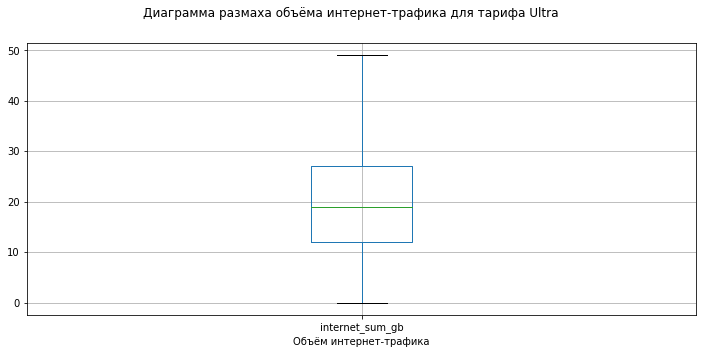

In [102]:
#построим диаграмму размаха объёма интернет-трафика для тарифа Ultra
ultra['internet_sum_gb'].plot.box(grid=True, figsize=(12,5))
plt.suptitle('Диаграмма размаха объёма интернет-трафика для тарифа Ultra')
plt.xlabel('Объём интернет-трафика')
plt.show()

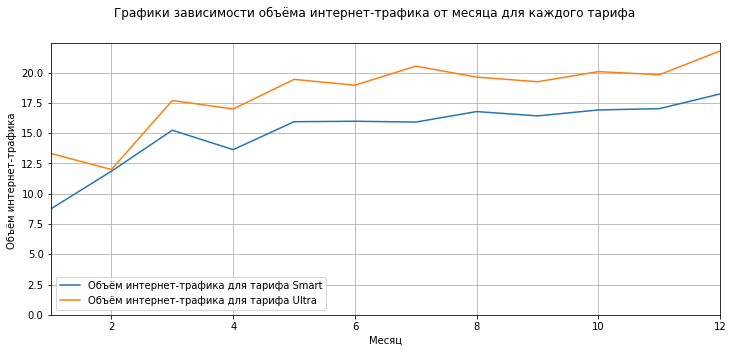

In [103]:
#построим графики зависимости количества сообщений от месяца для каждого тарифа
ax = smart.pivot_table(index ='month',
                                             values = 'internet_sum_gb').plot(y = 'internet_sum_gb', label = 'Объём интернет-трафика для тарифа Smart', figsize=(12,5), grid = True)
ultra.pivot_table(index ='month',
                                             values = 'internet_sum_gb').plot(y = 'internet_sum_gb', label = 'Объём интернет-трафика для тарифа Ultra', ax = ax, figsize=(12,5), grid = True)

plt.suptitle('Графики зависимости объёма интернет-трафика от месяца для каждого тарифа')
plt.xlabel('Месяц')
plt.ylabel('Объём интернет-трафика ')
plt.ylim(bottom=0)
plt.show()

In [104]:
print('Значение дисперсии объёма интернет-трафика для тарифа Smart:')
smart['internet_sum_gb'].var()

Значение дисперсии объёма интернет-трафика для тарифа Smart:


33.19255279476591

In [105]:
print('Значение дисперсии объёма интернет-трафика для тарифа Ultra:')
ultra['internet_sum_gb'].var()

Значение дисперсии объёма интернет-трафика для тарифа Ultra:


97.27380628121001

In [106]:
print('Значение стандартного отклонения объёма интернет-трафика для тарифа Smart:')
smart['internet_sum_gb'].std()

Значение стандартного отклонения объёма интернет-трафика для тарифа Smart:


5.761297839442594

In [107]:
print('Значение стандартного отклонения объёма интернет-трафика для тарифа Ultra:')
ultra['internet_sum_gb'].std()

Значение стандартного отклонения объёма интернет-трафика для тарифа Ultra:


9.862748414169856

### Вывод

На данном шаге проанализируем, какой объём интернет-трафика требуется пользователям каждого тарифа в месяц, посчитаем дисперсию и стандартное отклонение.
 - Среднее значение количества сообщений для тарифа Smart - 16
 - Среднее значение количества сообщений для тарифа Ultra - 19.5
 - Медианное значение количества сообщений для тарифа Smart - 17
 - Медианное значение количества сообщений для тарифа Ultra - 19
 - Значение дисперсии количества сообщений для тарифа Smart - 33
 - Значение дисперсии количества сообщений для тарифа Ultra - 97
 - Значение стандартного отклонения количества сообщений для тарифа Smart - 5.7
 - Значение стандартного отклонения количества сообщений для тарифа Ultra - 9.8

Сравним среднее значение и медиану для каждого тарифа. Для обоих тарифов среднее значение почти совпадает с медианным, то есть, если скошенность и есть, то незначительная.

Дисперсия значений для тарифа Ultra больше, чем для тарифа Smart.

Построим гистограммы распределения объёма интернет-трафика. Гистограммы распределения объёма интернет-трафика ассиметричны. 

Построим график изменения объёма интернет-трафика в зависимости от месяца. Больше всего пользователи обоих тарифов пользуются интернетом в декабре (также как и сообщениями, и звонками), меньше всего пользователи тарифа Smart пользуются интернетом в январе, а пользователи тарифа Ultra в феврале. На графике также видим, что рост объёма интернет-трафика у пользователей тарифа Smart происходит более плавно, чем у пользователей тарифа Ultra.

###  Распределение выручки по тарифам

In [108]:
#сформируем сводную таблицу и подсчитаем суммарную выручку
print('Суммарная выручка для каждого тарифа:')
df.pivot_table(columns='tariff', values='revenue_month', aggfunc='sum')

Суммарная выручка для каждого тарифа:


tariff,smart,ultra
revenue_month,2925590,2040000


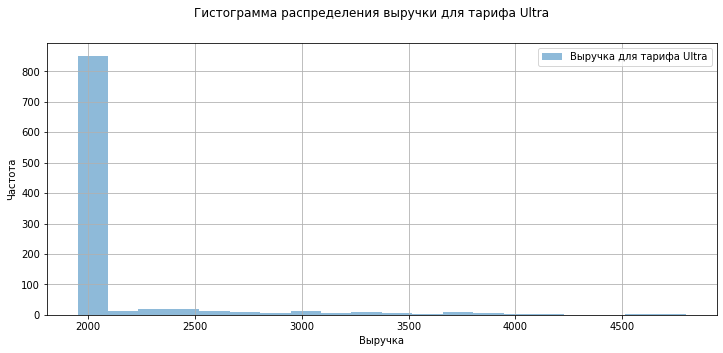

In [109]:
#построим гистограмму распределения выручки для тарифа Ultra
df[df['tariff'] == 'ultra'].plot(kind = 'hist',
                                                  y = 'revenue_month', label = 'Выручка для тарифа Ultra', alpha = 0.5, bins = 20, figsize=(12,5), grid = True)

plt.suptitle('Гистограмма распределения выручки для тарифа Ultra')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.show()

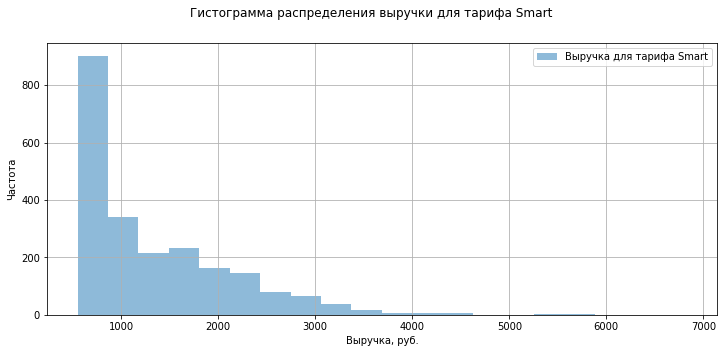

In [110]:
#построим гистограмму распределения выручки для тарифа Smart
df[df['tariff'] == 'smart'].plot(kind = 'hist',
                                                  y = 'revenue_month', label = 'Выручка для тарифа Smart', alpha = 0.5, bins = 20, figsize=(12,5), grid = True)

plt.suptitle('Гистограмма распределения выручки для тарифа Smart')
plt.xlabel('Выручка, руб.')
plt.ylabel('Частота')
plt.show()

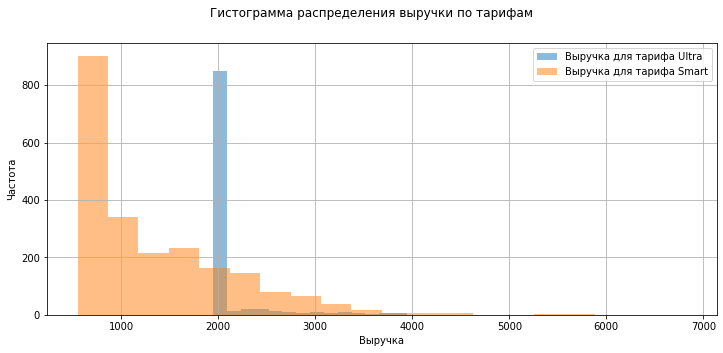

In [111]:
#отобразим два графика на одном для наглядности
ax = df[df['tariff'] == 'ultra'].plot(kind = 'hist',
                                                  y = 'revenue_month', label = 'Выручка для тарифа Ultra', alpha = 0.5, bins = 20, figsize=(12,5), grid = True)
df[df['tariff'] == 'smart'].plot(kind = 'hist',
                                                  y = 'revenue_month', label = 'Выручка для тарифа Smart', ax = ax, alpha = 0.5, bins = 20, figsize=(12,5), grid = True)

plt.suptitle('Гистограмма распределения выручки по тарифам')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.show()

### Вывод

На данном шаге рассчитаем суммарную выручку для каждого тарифа. Для тарифа Smart выручка составляет 2 923 590, для тарифа Ultra 2 040 000.
Построим гистограммы распределения выручки по тарифам. На гистограммах также отображается, что выручка от тарифа Smart больше, чем от тарифа Ultra.

## Проверим гипотезы <a id='Шаг4'></a>

### Проверка гипотезы  - Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Нулевая гипотеза H0 - Cредняя выручка пользователей тарифов Ultra и Smart равны, т.е равны средние значения


Альтернативная гипотеза H1 - Cредняя выручка пользователей тарифов Ultra и Smart не равны, т.е не равны средние значения

In [112]:
#для проверки используем критерий p-value
p_ultra = df[df['tariff'] == 'ultra']['revenue_month']
p_smart = df[df['tariff'] == 'smart']['revenue_month']

#cравним дисперсии двух выборок
print('Значение дисперсии для выборки p_ultra:', p_ultra.var())
print('Значение дисперсии для выборки p_smart:', p_smart.var())
print('Разница дисперсий: {:.1%}'.format((p_smart.var()-p_ultra.var())/ p_smart.var()))

print()

#проверим гипотезу о равенстве среднего двух генеральных совокупностей 
results = st.ttest_ind(p_ultra, p_smart, equal_var = False)

#критический уровень статистической значимости
alpha = 0.05 

print('p-значение:', results.pvalue)

#сравним получившееся p-значение с заданным уровнем статистической значимости
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение дисперсии для выборки p_ultra: 143491.24055961374
Значение дисперсии для выборки p_smart: 690458.1619886545
Разница дисперсий: 79.2%

p-значение: 1.2496710269965528e-233
Принимаем альтернативную гипотезу


### Вывод

Сформулируем нулевую и альтернативную гипотезы.
 - Нулевая гипотеза H0 - Cредняя выручка пользователей тарифов «Ультра» и «Смарт» равны, т.е равны средние значения
 - Альтернативная гипотеза H1 - Cредняя выручка пользователей тарифов «Ультра» и «Смарт» не равны, т.е не равны средние значения

До проведения проверки гипотезы cравним дисперсии двух выборок. Т.к. дисперсии различаются более чем на 5%, то считаем отличие значимым и выбираем параметр equal_var = False.
Для проверки используем критерий p-value, в результате вычислений получаем p-значение значительно меньшее критического уровня статистической значимости и принимаем альтернативную гипотезу, т.е. принимаем, что средняя выручка пользователей тарифов Ultra и Smart не равны.

### Проверка гипотезы  - Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [113]:
#добавим к набору данных df информацию о городе 
df = df.merge(df_users[['user_id', 'city']], on = 'user_id', how = 'left')
df.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,internet_sum_gb,tariff,revenue_month,city
0,1000,5,22.0,164.0,22.0,2257.0,3.0,ultra,1950,Краснодар
1,1000,6,43.0,187.0,60.0,23262.0,23.0,ultra,1950,Краснодар
2,1000,7,47.0,346.0,75.0,14017.0,14.0,ultra,1950,Краснодар
3,1000,8,52.0,418.0,81.0,14072.0,14.0,ultra,1950,Краснодар
4,1000,9,58.0,478.0,57.0,14583.0,15.0,ultra,1950,Краснодар


Нулевая гипотеза H0 - Cредняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов, т.е равны средние значения

Альтернативная гипотеза  H1 - Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, т.е не равны средние значения

In [114]:
#для проверки используем критерий p-value
p_moscow = df[df['city'] == 'Москва']['revenue_month']
p_another = df[df['tariff'] != 'Москва']['revenue_month']

#cравним дисперсии двух выборок
print('Значение дисперсии для выборки p_moscow:', p_moscow.var())
print('Значение дисперсии для выборки p_another:', p_another.var())
print('Разница дисперсий: {:.1%}'.format((p_another.var()-p_moscow.var())/ p_another.var()))

print()

#проверим гипотезу о равенстве среднего двух генеральных совокупностей 
results = st.ttest_ind(p_moscow, p_another, equal_var = False)

#критический уровень статистической значимости
alpha = 0.05 

print('p-значение:', results.pvalue)


#сравним получившееся p-значение с заданным уровнем статистической значимости
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение дисперсии для выборки p_moscow: 567332.0773309007
Значение дисперсии для выборки p_another: 645069.7178656016
Разница дисперсий: 12.1%

p-значение: 0.6291588964939612
Не получилось отвергнуть нулевую гипотезу


### Вывод

Сформулируем нулевую и альтернативную гипотезы. 
Нулевая гипотеза H0 - Cредняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов, т.е равны средние значения

Альтернативная гипотеза  H1 - Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, т.е не равны средние значения.

До проведения проверки гипотезы cравним дисперсии двух выборок. Т.к. дисперсии различаются более чем на 5%, то считаем отличие значимым и выбираем параметр equal_var = False.
Для проверки используем критерий p-value, в результате вычислений получаем p-значение больше критического уровня статистической значимости и не отвергаем нулевую гипотезу, т.е. принимаем, что средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов.

## Общий вывод <a id='Шаг5'></a>

В данном проекте перед нами стояла цель проанализировать поведение клиентов федерального оператора сотовой связи «Мегалайн» и понять, какой из двух тарифов приносит оператору больше денег.


Мы изучили и подготовили данные к исследованию. В таблицах  'df_calls', 'df_messages', 'df_internet', 'df_tariffs' пропущенные значения отсутствовали. В таблице 'df_users' в столбце 'churn_date' значений было меньше, чем в остальных столбцах, но для таких случаев считали, что для пропущенных значений тариф ещё действовал на момент выгрузки данных, а у 38 пользователей из 500 тариф уже не действовал.

 - Для таблицы с информацией о пользователях 'df_users' скорректировали формат отображения дат для столбцов 'reg_date' и 'churn_date'. Добавили к набору данных столбцы с номером месяца и столбец с продолжительностью использования тарифа в днях.
 - Для таблицы с информацией о звонках 'df_calls' построили гистограмму. Гистограмма отображается с длинным хвостом на высоких значениях и пиковым значением на малых. Длительность многих звонков — 0.0 минут. Количество таких звонков с нулевой длительностью равна 39613, что составляет почти 20% от общего числа звонков.Это большой процент, такие значения не исключали, а заменили на единицу. Далее округлили значения длительности звонков вверх,т.к. в соответствии с условием «Мегалайн» всегда округляет вверх значения минут, и заменили вещественный тип данных на целочисленный для значений длительности звонков.
 - Для таблицы с информацией о сообщениях 'df_messages' скорректировали формат отображения дат и добавили к набору данных новый столбец с месяцем.
 - Для таблицы с информацией об интернет-сессиях построили гистограмму. Гистограмма отображается с длинным хвостом на высоких значениях и пиковым значением на малых. Объём некоторых интернет-сессий — 0 Мб. Количество таких интернет-сессий с нулевым объёмом равно 19598, что составляет 13,1 % от общего объёма интернет-сессий. Это большой процент, будем считать, что такие ситуации могли возникнуть, когда пользователь зашёл в интернет, но потом интернет-соединение оборвалось, например, когда пользователь поднимался/спускался на лифте. Такие значения не исключали, а заменили на единицу, также как и с длительностью звонков. Также округлили значения объёма потраченного за сессию интернет-трафика, т.к. в соответствии с условием «Мегалайн» всегда округляет вверх значения мегабайтов. Далее заменили вещественный тип данных на целочисленный, скорректировали формат отображения дат и добавили к набору данных новый столбец с месяцем.
 - Для таблицы с информацией о тарифах 'df_tariffs' добавили новый столбец, где для удобства перевели Мб в Гб.

Далее для каждого пользователя посчитали количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам  при помощи сводных таблиц.
Также подсчитали максимальное и минимальное значение для каждого из показателей.
 - Максимальное количество сделанных звонков - 244, минимальное количество сделанных звонков - 1
 - Максимальное количество израсходованных минут - 1727, минимальное количество израсходованных минут - 1
 - Максимальное количество отправленных сообщений - 224, минимальное количество отправленных сообщений - 1
 - Максимальный объём израсходанного интернет-трафика - 49.0, минимальный объём израсходанного интернет-трафика - 1.0
 

Для вычисления выручки объедили таблицы в одну при помощи merge(): сначала объединили талицы с информацией о звонках и сообщениях, далее к объединённой добавили данные по интернету, и следом данные по тарифам. 
После объединения проверили количество уникальных пользователей, оно составляет 498 (из 500), значит, два пользователя не попали в новый набор. У данных пользователей дата подключения тарифа 'reg_date' и дата прекращения пользования тарифом 'churn_date' отличаются на восемь и пять дней соответственно, т.е.пользователи подключились к тарифу, и практически сразу прекратили им пользоваться. 
Далее вычислили пользователей, которые пользовались тарифом непродолжительное время, менее месяца, аналогично найденным двум пользователям. Таких пользователей оказалось трое, т.е. суммарно всего пять человек из 500 пользовались услугами оператора меньше месяца.

Для вычисления помесячной выручки написали функцию, в которой подсчитали разницу между потраченным пользователем объёмом услуг и включенным в пакет, рассчитали дополнительную плату, если пользователь вышел за пределы пакета услуг и прибавили абонентскую плату, соответствующую тарифному плану.
В итоге максимальное значение выручки 6824, минимальное - 550.


После подсчитали, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитали среднее количество, дисперсию и стандартное отклонение, построили гистограммы.
 - Проанализировали, сколько минут разговора требуется пользователям каждого тарифа, посчитали дисперсию и стандартное отклонение. Сравнили среднее значение и медиану для каждого тарифа. Для тарифа Smart среднее значение немного меньше медианного, значит, набор данных немного скошен влево.  Для тарифа Ultra среднее значение больше медианного, значит, набор данных скошен вправо. Дисперсия значений для тарифа Ultra больше, чем для тарифа Smart. Построили гистограммы длительности телефонных разговоров. Гистограммы распределения длительности звонков ассиметричны, прослеживается скошенность вправа. Построили график изменения длительности в зависимости от месяца. Больше всего пользователи обоих тарифов разговаривают по телефону в декабре (что ожидаемо из-за закрытия года и праздников), меньше всего пользователи тарифа Smart разговаривают в январе, а пользователи тарифа Ultra в феврале. На графике также отображается, что рост длительности звонков у пользователей тарифа Smart происходит более плавно, чем у пользователей тарифа Ultra. На диаграмме размаха длительности звонков также отображается скошенность вправо.
  - Среднее значение длительности звонков для тарифа Smart - 429 мин.
  - Среднее значение длительности звонков для тарифа Ultra - 540 мин.
  - Медианное значение длительности звонков для тарифа Smart - 435 мин.
  - Медианное значение длительности звонков для тарифа Ultra - 532 мин.
  - Значение дисперсии длительности звонков для тарифа Smart - 37974
  - Значение дисперсии длительности звонков для тарифа Ultra - 106105
  - Значение стандартного отклонения длительности звонков для тарифа Smart - 194
  - Значение стандартного отклонения длительности звонков для тарифа Ultra - 325

 - Подсчитали, сколько сообщений требуется пользователям каждого тарифа в месяц, посчитаем дисперсию и стандартное отклонение. Сравнили среднее значение и медиану для каждого тарифа. Для обоих тарифов среднее значение больше медианного, значит, набор данных скошен вправо. Дисперсия значений для тарифа Ultra больше, чем для тарифа Smart. Построили гистограммы распределения количества сообщений. Гистограммы распределения количества сообщений ассиметричны, прослеживается скошенность вправа. Построили график изменения количества сообщений в зависимости от месяца. Больше всего пользователи обоих тарифов отправляют сообщений в декабре (что также ожидаемо из-за закрытия года и праздников), меньше всего пользователи тарифа Smart отправляют сообщений в январе, а пользователи тарифа Ultra в феврале. На графике также отображается, что рост количества сообщений у пользователей тарифа Smart происходит более плавно, чем у пользователей тарифа Ultra. 
  - Среднее значение количества сообщений для тарифа Smart - 33
  - Среднее значение количества сообщений для тарифа Ultra - 49
  - Медианное значение количества сообщений для тарифа Smart - 28
  - Медианное значение количества сообщений для тарифа Ultra - 38
  - Значение дисперсии количества сообщений для тарифа Smart - 796
  - Значение дисперсии количества сообщений для тарифа Ultra - 2285
  - Значение стандартного отклонения количества сообщений для тарифа Smart - 28
  - Значение стандартного отклонения количества сообщений для тарифа Ultra - 47


 - Проанализировали, какой объём интернет-трафика требуется пользователям каждого тарифа в месяц, посчитаем дисперсию и стандартное отклонение. Сравнили среднее значение и медиану для каждого тарифа. Для обоих тарифов среднее значение почти совпадает с медианным, то есть, если скошенность и есть, то незначительная. Дисперсия значений для тарифа Ultra больше, чем для тарифа Smart. Построили гистограммы распределения объёма интернет-трафика. Гистограммы распределения объёма интернет-трафика ассиметричны. Построили график изменения объёма интернет-трафика в зависимости от месяца. Больше всего пользователи обоих тарифов пользуются интернетом в декабре (также как и сообщениями, и звонками), меньше всего пользователи тарифа Smart пользуются интернетом в январе, а пользователи тарифа Ultra в феврале. На графике также отображается, что рост объёма интернет-трафика у пользователей тарифа Smart происходит более плавно, чем у пользователей тарифа Ultra.
  - Среднее значение количества сообщений для тарифа Smart - 16
  - Среднее значение количества сообщений для тарифа Ultra - 19.5
  - Медианное значение количества сообщений для тарифа Smart - 17
  - Медианное значение количества сообщений для тарифа Ultra - 19
  - Значение дисперсии количества сообщений для тарифа Smart - 33
  - Значение дисперсии количества сообщений для тарифа Ultra - 97
  - Значение стандартного отклонения количества сообщений для тарифа Smart - 5.7
  - Значение стандартного отклонения количества сообщений для тарифа Ultra - 9.8
 

Далее рассчитали суммарную выручку для каждого тарифа. Для тарифа Smart выручка составляет 2 923 590, для тарифа Ultra 2 040 000. Построили гистограммы распределения выручки по тарифам. На гистограммах также отображается, что выручка от тарифа Smart больше, чем от тарифа Ultra.

В завершении исследования сформулировали и проверили гипотезы.
 - Нулевая гипотеза H0 - Cредняя выручка пользователей тарифов «Ультра» и «Смарт» равны, т.е равны средние значения. Альтернативная гипотеза H1 - Cредняя выручка пользователей тарифов «Ультра» и «Смарт» не равны, т.е не равны средние значения.
  - Для проверки использовали критерий p-value, в результате вычислений получили p-значение значительно меньшее критического уровня статистической значимости и приняли альтернативную гипотезу, т.е. что средняя выручка пользователей тарифов Ultra и Smart не равны.
 - Нулевая гипотеза H0 - Cредняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов, т.е равны средние значения. Альтернативная гипотеза  H1 - Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, т.е не равны средние значения.
  - Для проверки использовали критерий p-value, в результате вычислений получили p-значение больше критического уровня статистической значимости и не отвергли нулевую гипотезу, т.е. допускаем, что средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов.
 
В итоге можем сказать, что тариф Smart приносит оператору сотовой связи «Мегалайн» больше дохода, чем тариф Ultra. 